In [134]:
path="/content/Life_Expectancy_Data.csv"

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [136]:
df=pd.read_csv(path)
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.259210,33700000.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.744976,31700000.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.959000,3700000.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.537231,2980000.0,18.2,18.2,0.454,9.5


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   int64  
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   int64  
 9   Measles                          1649 non-null   int64  
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio               

In [138]:
# No Missing values, check for duplicate values
df.duplicated().sum()

np.int64(0)

In [139]:
# No duplicate values either , so check unique values for Country and Status as they are text values and replace with numeric values
df["Country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Costa Rica', 'Croatia', 'Cyprus',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'France', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Israel',
       'Italy', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati',
       'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Lithuania',
       'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia'

In [140]:
df["Status"].unique()

array(['Developing', 'Developed'], dtype=object)

In [141]:
#  So we can change Status using map into 0 and 1, while we have to use Encoder for Country
df["Status"]=df["Status"].map({"Developing":1,"Developed":0})

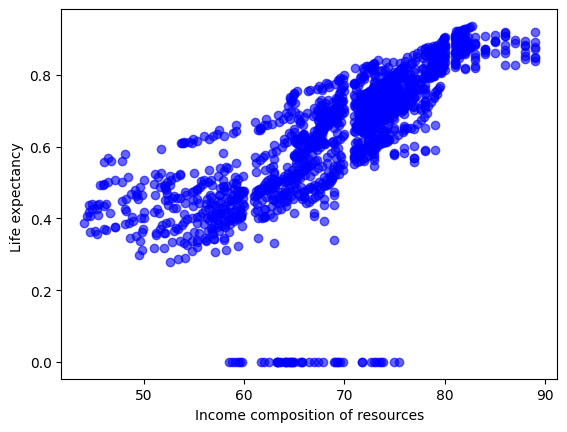

In [142]:
plt.scatter(df["Life expectancy"],df["Income composition of resources"],alpha=0.6,color='blue')
plt.xlabel("Income composition of resources")
plt.ylabel("Life expectancy ")
plt.show()

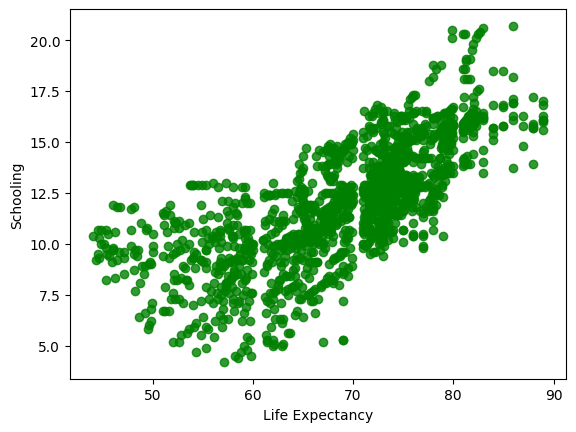

In [143]:
plt.scatter(df["Life expectancy"],df["Schooling"],alpha=0.8,color='green')
plt.xlabel("Life Expectancy")
plt.ylabel("Schooling")
plt.show()

In [144]:
# plt.bar(df["Schooling"],df["Country"],alpha=0.6,color='orange')
# plt.show()

In [145]:
le=LabelEncoder()

In [146]:
df["Country"]=le.fit_transform(df["Country"])

In [147]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.259210,33700000.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.744976,31700000.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.959000,3700000.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.537231,2980000.0,18.2,18.2,0.454,9.5


In [148]:
# We use SVM(Support Vector Machine) in this
svr=SVR()

In [149]:
X=df.drop("Life expectancy",axis=1)
y=df["Life expectancy"]

In [150]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [151]:
svr.fit(X_train,y_train)
y_pred=svr.predict(X_test)

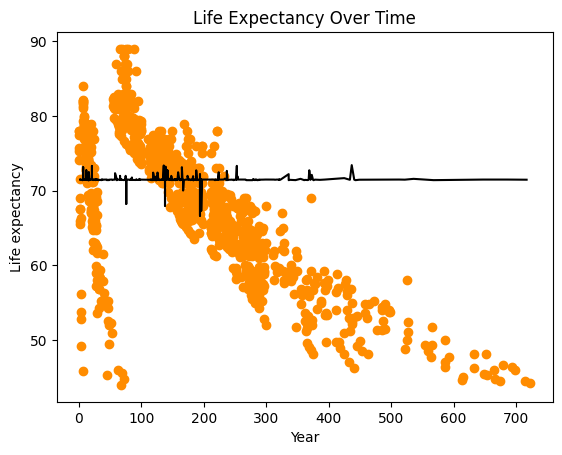

In [152]:
# Get sorted indices based on Adult Mortality
sorted_idx = X_test['Adult Mortality'].argsort()
plt.scatter(X_train['Adult Mortality'], y_train,color='darkorange')  # scatter plot of training data
plt.plot(X_test['Adult Mortality'].iloc[sorted_idx], y_pred, color='black') # predicted values as a line
plt.xlabel("Year")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy Over Time")
plt.show()

In [153]:
# Perfect model: R² = 1
# Model that predicts the mean of y_test: R² = 0
# Worse than mean prediction: R² < 0

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

R² Score: -0.0386


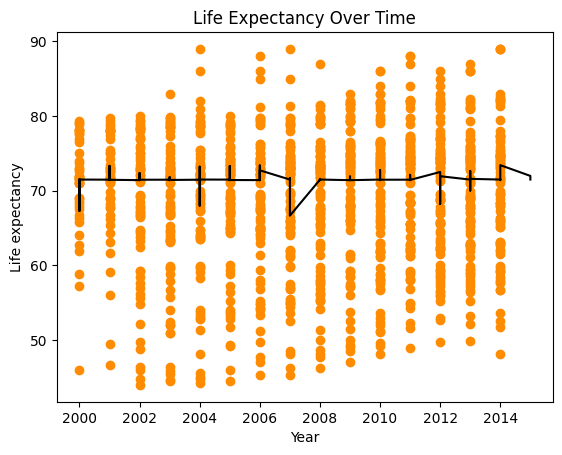

In [156]:
sorted_idx = X_test['Year'].argsort()
plt.scatter(X_train['Year'], y_train,color='darkorange')
plt.plot(X_test['Year'].iloc[sorted_idx], y_pred[sorted_idx], color='black')
plt.xlabel("Year")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy Over Time")
plt.show()

## Lets use Decision Tree Regressor

In [157]:
dtr=DecisionTreeRegressor()

In [158]:
dtr.fit(X_train,y_train)
y_pred_dtr=dtr.predict(X_test)

In [159]:
r2=r2_score(y_test,y_pred_dtr)
print(f"R² Score: {r2:.4f}")

R² Score: 0.9029


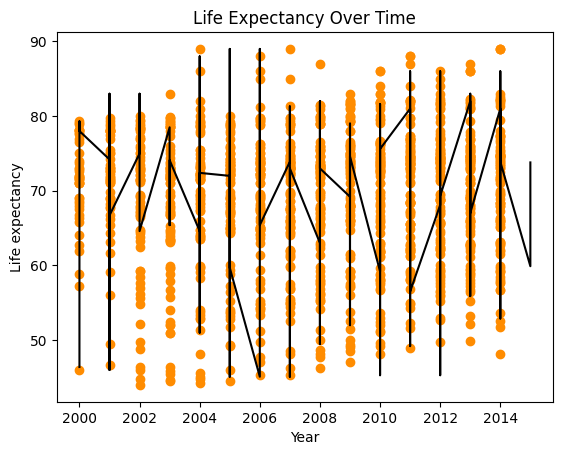

In [164]:
sorted_idx_dtr= X_test['Year'].argsort()
plt.scatter(X_train['Year'], y_train,color='darkorange')
plt.plot(X_test['Year'].iloc[sorted_idx_dtr], y_pred_dtr[sorted_idx_dtr], color='black')
plt.xlabel("Year")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy Over Time")
plt.show()

## Model:
### Here Decision Tree works better then SVM